In [1]:
import numpy as np
import pandas as pd

### Q1) Load the dataset and print the metadata in the notebook.

In [2]:
#Load the dataset
df = pd.read_csv('loan_data.csv')

#Print first 5 rows
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
#Print the column names
print(df.columns)

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')


In [4]:
#Print dimension of the data
print(df.shape)

(9578, 14)


#### The data has 9578 rows and 14 columns

### Q2) Print a heatmap to check NULL values. 

<Axes: >

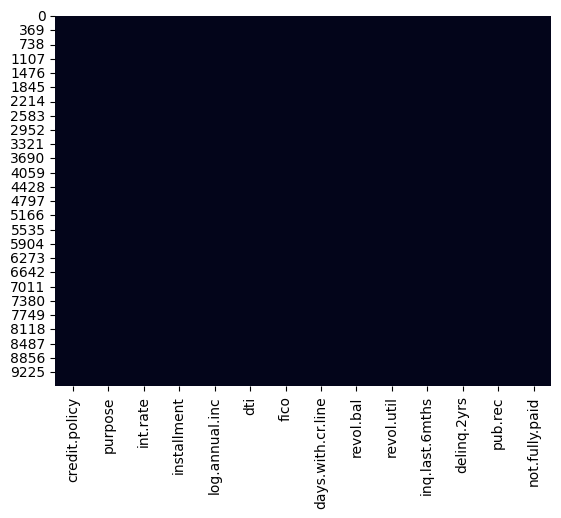

In [5]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False)

#### There are no missing values in any of the columns. Lets confirm the same using other null check methods.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


#### All rows in all columns are non null values

In [7]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

#### There are no null or missing values in any of the columns

#### Since decision tree operates on numerical data and involves numerical operations such as information gain and gini index we should encode all categorical attributes.

In [8]:
from category_encoders import OneHotEncoder

# One-hot encoding for column 'purpose'
ohe = OneHotEncoder(cols=['purpose'])
df = ohe.fit_transform(df)

In [9]:
df.head()

,credit.policy,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,1,0,0,0,0,0,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0,1,0,0,0,0,0,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,1,0,0,0,0,0,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,1,0,0,0,0,0,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0,1,0,0,0,0,0,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


### Q3) Perform stratified splitting of train and test data. 

In [11]:
#not.fully.paid is the target attribute here

#Drop target attribute and take the remaining columns as features/attributes (X)
X = df.drop('not.fully.paid', axis =1).values

#Take the not.fully.paid column as target variable (y)
y = df['not.fully.paid'].values

In [12]:
from sklearn.model_selection import train_test_split

#Stratified splitting of train and test data with test_size = 0.2
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Q4) Build a classifier model using the Decision Tree algorithm. 

In [13]:
from sklearn.tree import DecisionTreeClassifier

#Create a Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)

#Train the model using the training sets
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
y_train_pred = classifier.predict(X_train)

y_test_pred = classifier.predict(X_test)

### Q5) Print confusion matrix and classification report before and after pruning the Decision tree

In [15]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy Score before pruning", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy Score before pruning", accuracy)

Training Accuracy Score before pruning 1.0
Testing Accuracy Score before pruning 0.7458246346555324


#### By the training accuracy score we can see that the tree is overfitted based on the training data.

In [16]:
from sklearn.metrics import confusion_matrix

cm_b4_pruning = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix before pruning")
print(cm_b4_pruning)

Confusion Matrix before pruning
[[1344  265]
 [ 222   85]]


In [17]:
#Confusion matrix before pruning
pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,1344,265,1609
1,222,85,307
All,1566,350,1916


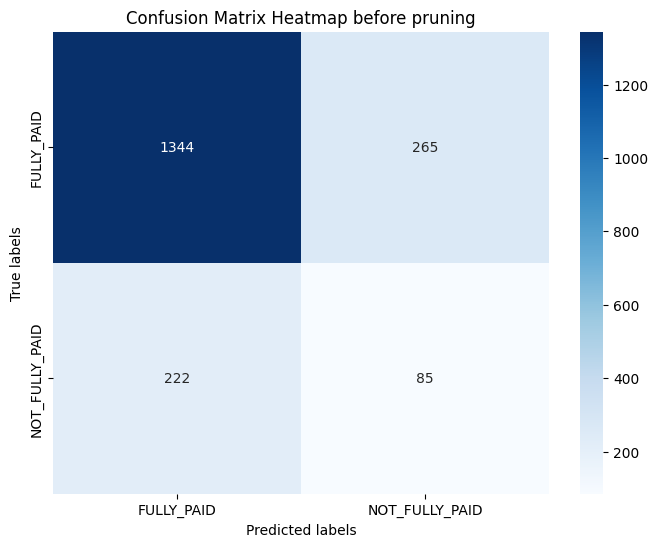

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix before pruning
plt.figure(figsize=(8, 6))
sns.heatmap(cm_b4_pruning, annot=True, fmt='d', cmap='Blues', xticklabels=['FULLY_PAID','NOT_FULLY_PAID'] , 
            yticklabels=['FULLY_PAID','NOT_FULLY_PAID'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap before pruning')
plt.show()

In [19]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print("Classification Report before pruning:\n", report)

Classification Report before pruning:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85      1609
           1       0.24      0.28      0.26       307

    accuracy                           0.75      1916
   macro avg       0.55      0.56      0.55      1916
weighted avg       0.76      0.75      0.75      1916



#### Post-Pruning - Cost-Complexity Pruning

In [20]:
path = classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.00000000e+00 8.59352929e-05 8.63697084e-05 8.66328196e-05
 1.08761855e-04 1.08761855e-04 1.08761855e-04 1.11869337e-04
 1.11869337e-04 1.14199948e-04 1.16012645e-04 1.16012645e-04
 1.16012645e-04 1.17462803e-04 1.17462803e-04 1.18649296e-04
 1.18649296e-04 1.18649296e-04 1.18649296e-04 1.19638041e-04
 1.19638041e-04 1.19638041e-04 1.20474670e-04 1.20474670e-04
 1.20474670e-04 1.20474670e-04 1.20474670e-04 1.21191781e-04
 1.21191781e-04 1.21191781e-04 1.21191781e-04 1.21513245e-04
 1.21813278e-04 1.21813278e-04 1.21813278e-04 1.21813278e-04
 1.22357087e-04 1.22357087e-04 1.22357087e-04 1.22357087e-04
 1.22836919e-04 1.22984559e-04 1.23263436e-04 1.23263436e-04
 1.23645056e-04 1.23645056e-04 1.23988515e-04 1.24299263e-04
 1.24299263e-04 1.24581761e-04 1.25076133e-04 1.25076133e-04
 1.25223109e-04 1.25293657e-04 1.25293657e-04 1.25494448e-04
 1.25494448e-04 1.25680366e-04 1.25680366e-04 1.25727025e-04
 1.25853004e-04 1.26163752e-04 1.26163752e-04 1.26304090e-04
 1.26304090e-04 1.264356

In [21]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

We will remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node.

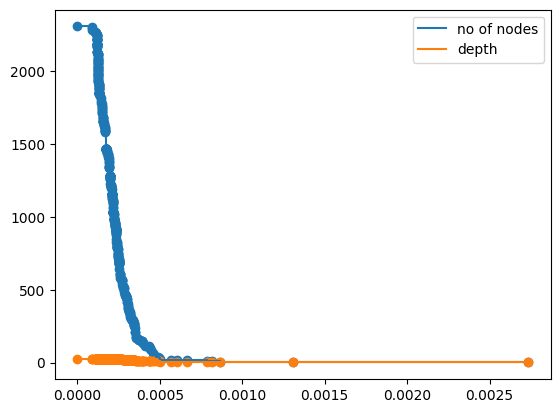

In [22]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

We can see from the above graph that if alpha increases then no of nodes and depth decreases

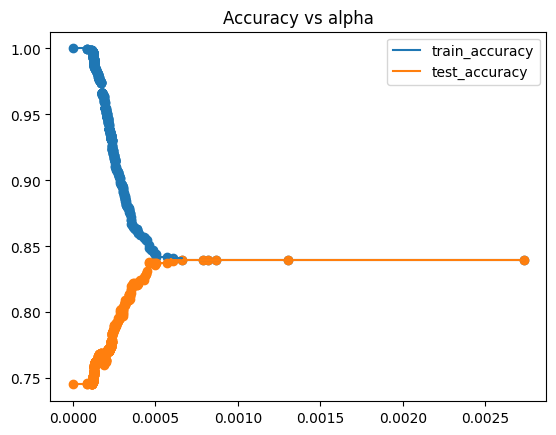

In [23]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Lets choose the alpha value as 0.0005 where the training accuracy and testing accuracy meets.

In [24]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.0005)
clf.fit(X_train,y_train)
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [25]:
accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy Score after pruning", accuracy)

accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy Score after pruning", accuracy)

Training Accuracy Score after pruning 0.8445575567736884
Testing Accuracy Score after pruning 0.8361169102296451


**From the training accuracy score we can infer that the tree is not overfitted based on the training data set.**

**The accuracy score on the testing data has been improved now after the pruning.**

In [26]:
from sklearn.metrics import confusion_matrix

cm_after_pruning = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix after pruning")
print(cm_after_pruning)

Confusion Matrix after pruning
[[1588   21]
 [ 293   14]]


In [27]:
#Confusion matrix after pruning
pd.crosstab(y_test, y_test_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,1588,21,1609
1,293,14,307
All,1881,35,1916


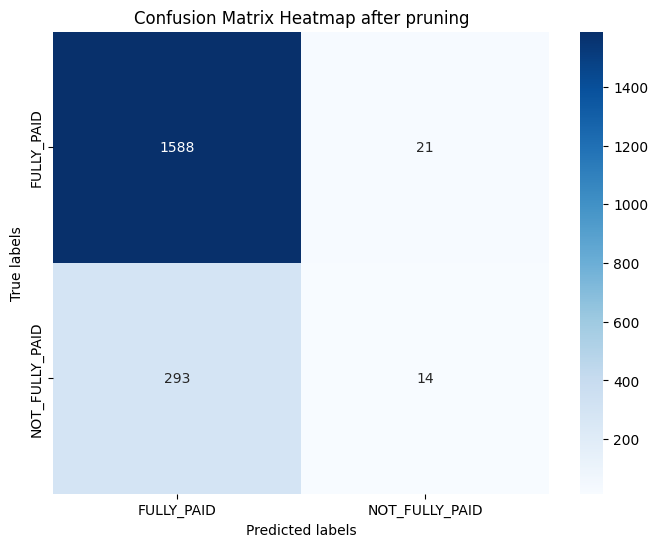

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix after pruning
plt.figure(figsize=(8, 6))
sns.heatmap(cm_after_pruning, annot=True, fmt='d', cmap='Blues', xticklabels=['FULLY_PAID','NOT_FULLY_PAID'] , 
            yticklabels=['FULLY_PAID','NOT_FULLY_PAID'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap after pruning')
plt.show()

In [29]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred)
print("Classification Report after pruning:\n", report)

Classification Report after pruning:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      1609
           1       0.40      0.05      0.08       307

    accuracy                           0.84      1916
   macro avg       0.62      0.52      0.50      1916
weighted avg       0.77      0.84      0.78      1916



### Q6) Plot the final decision tree model.

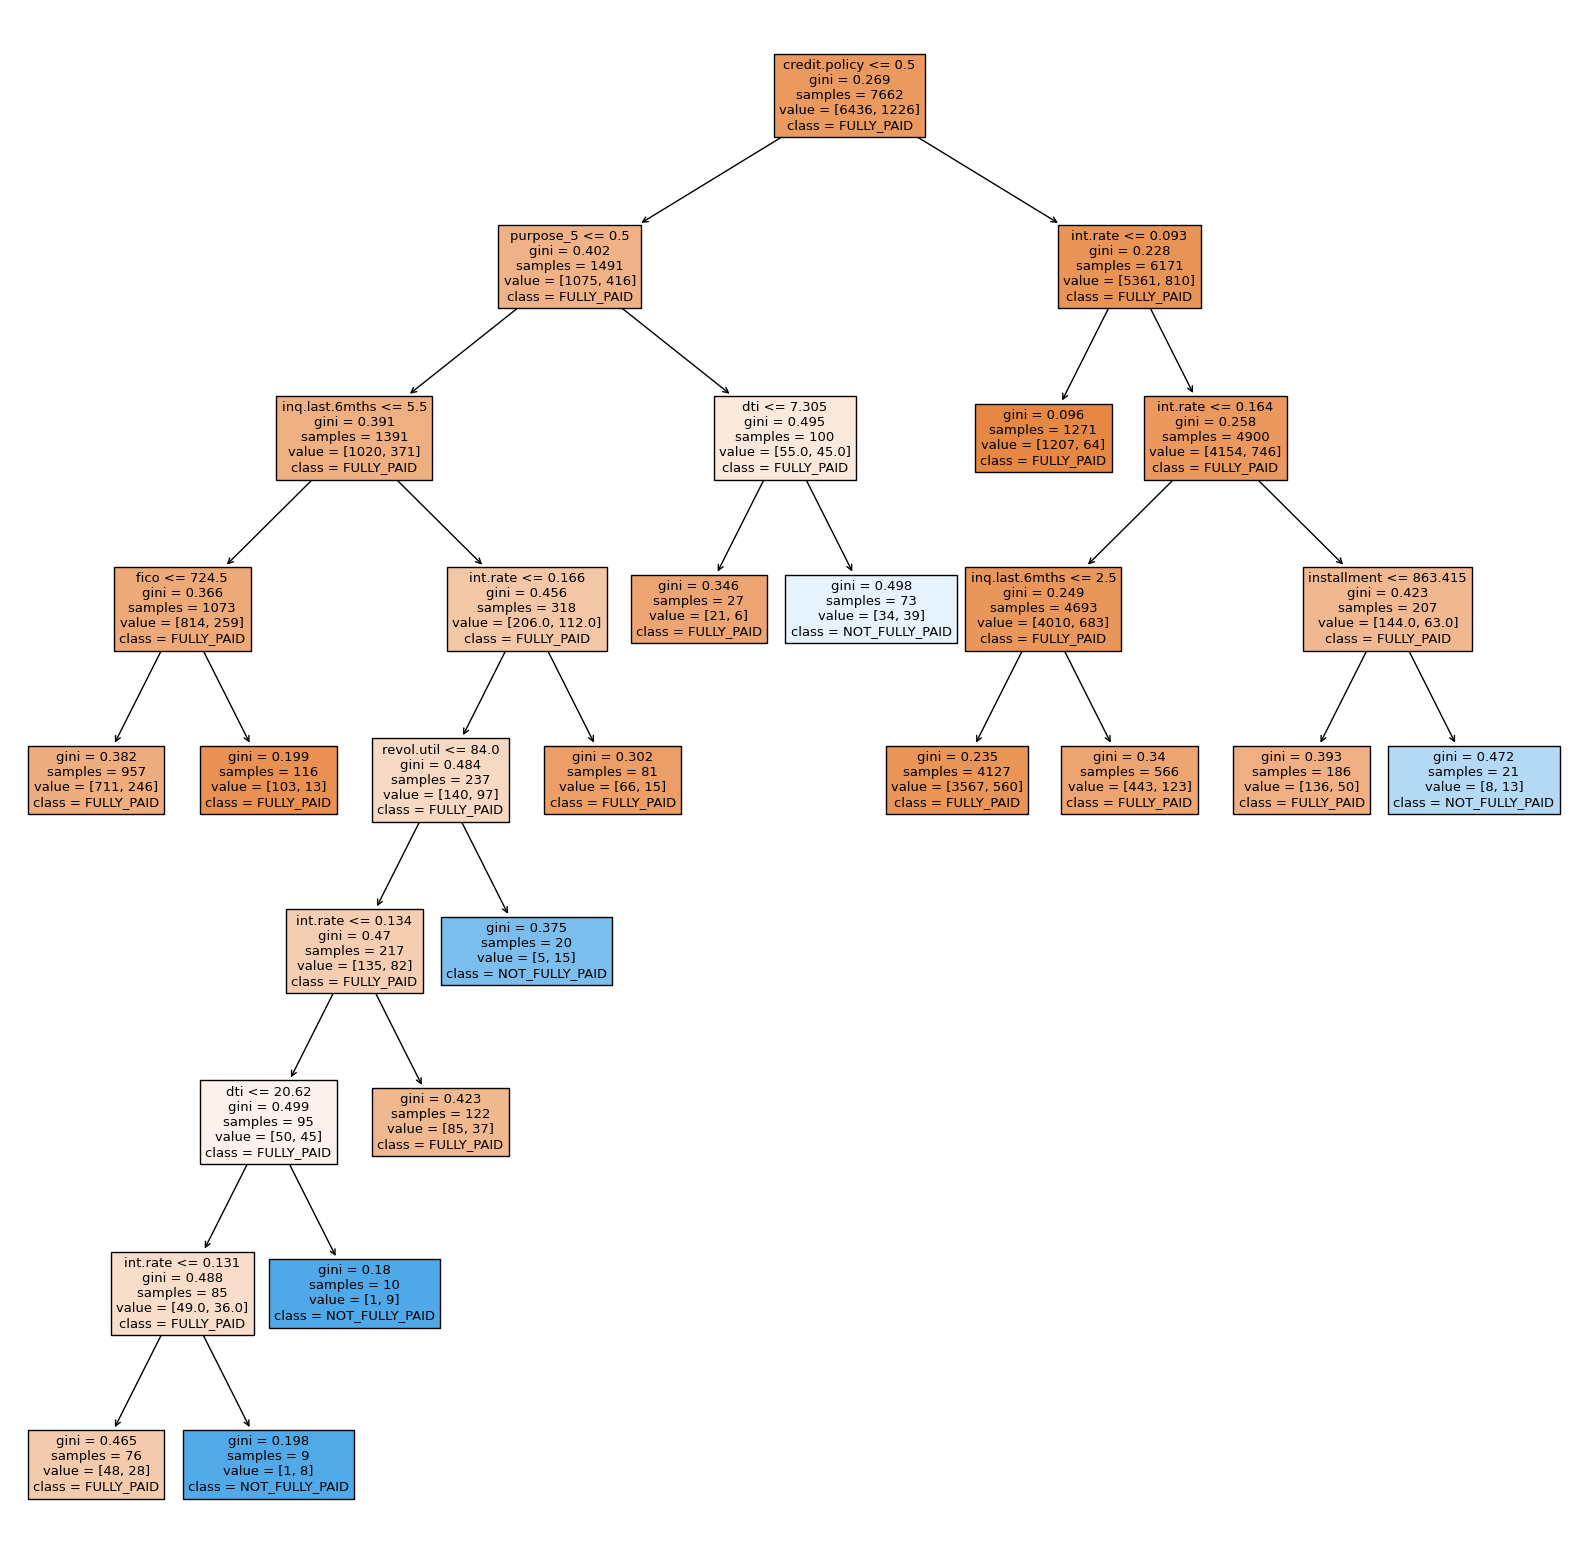

In [30]:
from sklearn.tree import plot_tree
features = ['credit.policy', 'purpose_1', 'purpose_2', 'purpose_3', 'purpose_4',
       'purpose_5', 'purpose_6', 'purpose_7', 'int.rate', 'installment',
       'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal',
       'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec']
classes = ['FULLY_PAID','NOT_FULLY_PAID']
plt.figure(figsize=(20,20))
plot_tree(clf,feature_names=features,class_names=classes,filled=True)
plt.show()

In [31]:
from sklearn.tree import export_text

# Print the decision tree
tree_text = export_text(clf, feature_names=features)
print(tree_text)

|--- credit.policy <= 0.50
|   |--- purpose_5 <= 0.50
|   |   |--- inq.last.6mths <= 5.50
|   |   |   |--- fico <= 724.50
|   |   |   |   |--- class: 0
|   |   |   |--- fico >  724.50
|   |   |   |   |--- class: 0
|   |   |--- inq.last.6mths >  5.50
|   |   |   |--- int.rate <= 0.17
|   |   |   |   |--- revol.util <= 84.00
|   |   |   |   |   |--- int.rate <= 0.13
|   |   |   |   |   |   |--- dti <= 20.62
|   |   |   |   |   |   |   |--- int.rate <= 0.13
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- int.rate >  0.13
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- dti >  20.62
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- int.rate >  0.13
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- revol.util >  84.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- int.rate >  0.17
|   |   |   |   |--- class: 0
|   |--- purpose_5 >  0.50
|   |   |--- dti <= 7.31
|   |   |   |--- class: 0
|   |   |--- dti >

### Q7) Find out the stratified cross-validation accuracy

In [32]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Initialize StratifiedKFold with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and compute accuracy scores
scores = cross_val_score(clf, X, y, cv=skf, scoring='accuracy')

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", scores)

# Mean accuracy
print("Mean accuracy:", np.mean(scores))

Accuracy scores for each fold: [0.82985386 0.83194154 0.83611691 0.83759791 0.8386423 ]
Mean accuracy: 0.8348305052410101
